In [240]:
!pip install pymongo

Defaulting to user installation because normal site-packages is not writeable


In [241]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import ast

client = MongoClient("mongodb://localhost:27017/")
db = client["local"]
collection = db["Term_proj"]


In [242]:
cursor = collection.find({"model":"RNN", "dataset":"KDD_TEST_PLUS", "num_nodes":20, "lr":.01, "isMulti":True, "epochs":99}).sort({"epochs":1})
cursor_2 = collection.find({"model":"RNN", "dataset":"KDD_TEST_MINUS", "num_nodes":20, "lr":.01, "isMulti":True, "epochs":99}).sort({"epochs":1})

In [243]:
cursor = collection.find({"model":"RNN", "dataset":"KDD_TEST_PLUS", "isMulti":False, "Confusion": {"$ne":None, "$exists":True}}).sort({"test_acc":-1}).limit(1)

In [244]:
df = pd.DataFrame(list(cursor))
print(df)

                        _id model        dataset act_func  epochs  num_nodes  \
0  680813d17e7f22e95d7d131b   RNN  KDD_TEST_PLUS  sigmoid      97        240   

     lr  isMulti  train_acc  test_acc  train_time  \
0  0.01    False   0.996475  0.921395  181.050609   

                      Confusion     timestamp  
0  [[9309, 544], [1228, 11462]]  1.745360e+09  


In [245]:
cm = np.array(ast.literal_eval(df['Confusion'].iloc[0]))
print(cm)

[[ 9309   544]
 [ 1228 11462]]


In [246]:
binary_labels = ['normal', 'attack']
mult_labels = ['normal','dos', 'r2l', 'u2r','probe']

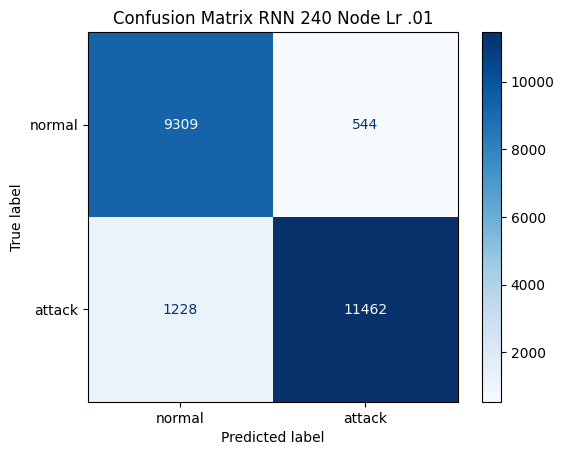

In [247]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binary_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix RNN 240 Node Lr .01")
plt.show()

In [252]:
cursor = collection.find({"model":"RNN", "dataset":"KDD_TEST_PLUS", "isMulti":True, "Confusion": {"$ne":None, "$exists":True}}).sort({"test_acc":-1}).limit(1)
df = pd.DataFrame(list(cursor))
print(df)

                        _id model        dataset act_func  epochs  num_nodes  \
0  680826927e7f22e95d7d1a35   RNN  KDD_TEST_PLUS  sigmoid      15        120   

     lr  isMulti  train_acc  test_acc  train_time  \
0  0.01     True    0.99692   0.84829   22.075509   

                                           Confusion     timestamp  
0  [[9525, 63, 23, 3, 239], [656, 6551, 85, 0, 16...  1.745365e+09  


[[9525   63   23    3  239]
 [ 656 6551   85    0  167]
 [1638    2 1015    5   83]
 [  30    0   22   13    2]
 [ 111  290    1    0 2019]]


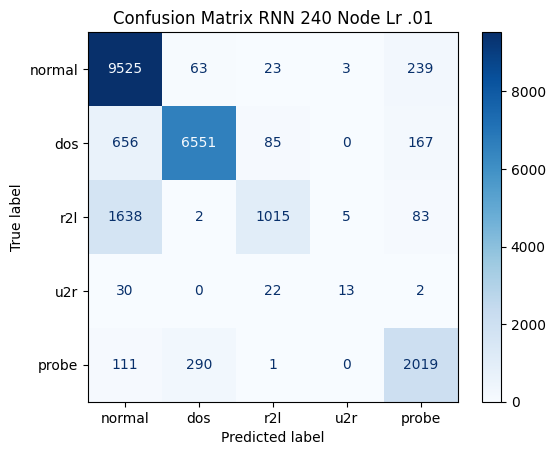

In [253]:
cm = np.array(ast.literal_eval(df['Confusion'].iloc[0]))
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mult_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix RNN 240 Node Lr .01")
plt.show()